In [1]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.preprocessing import LabelEncoder

import json

import pickle


## Problem Statement :

## Data Gathering :

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

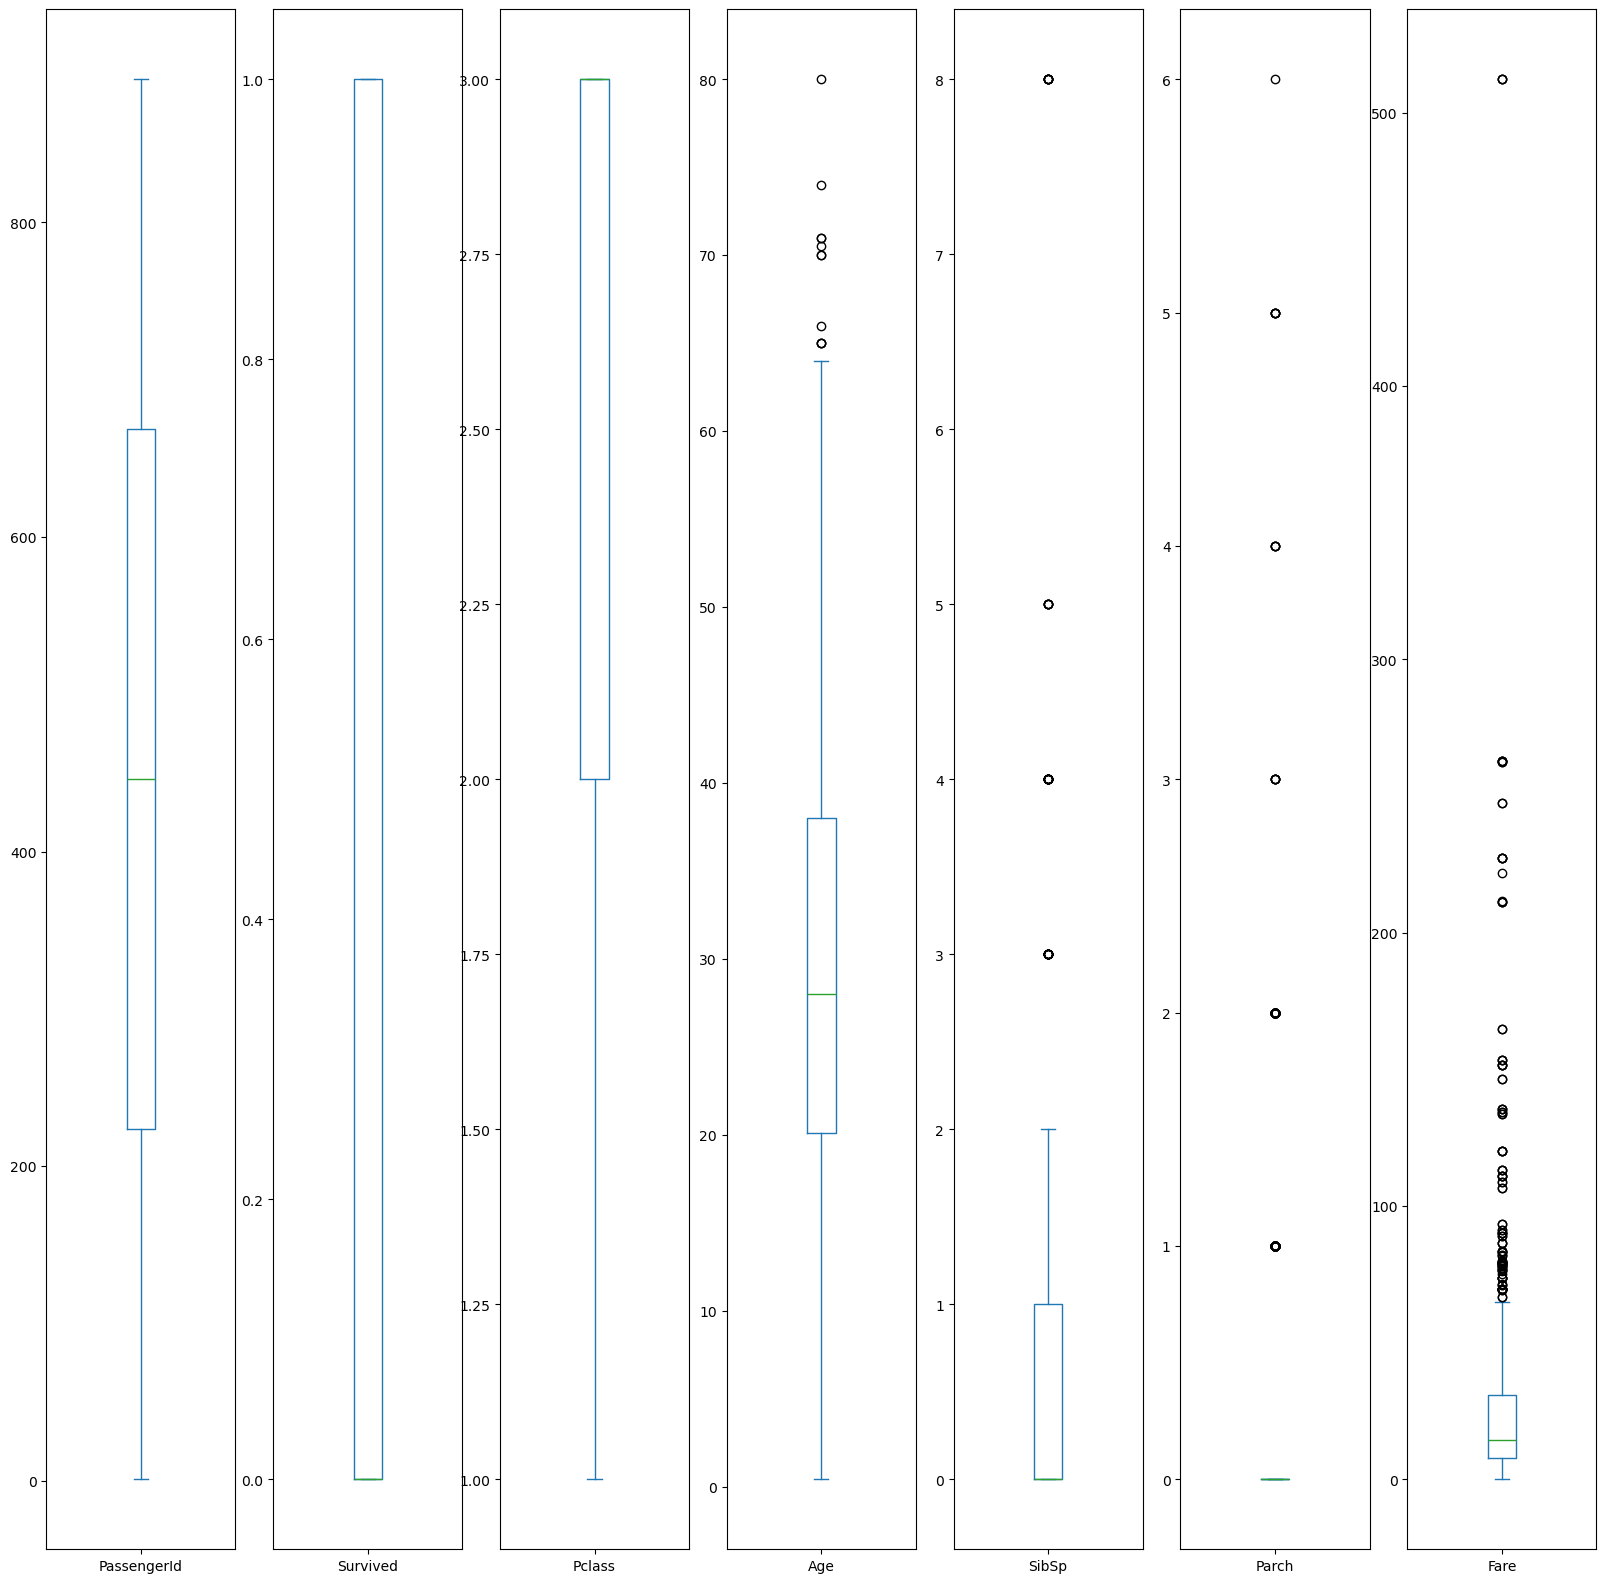

In [8]:
df.plot(kind='box',subplots=True,figsize=(20,20))
plt.show()

<Axes: >

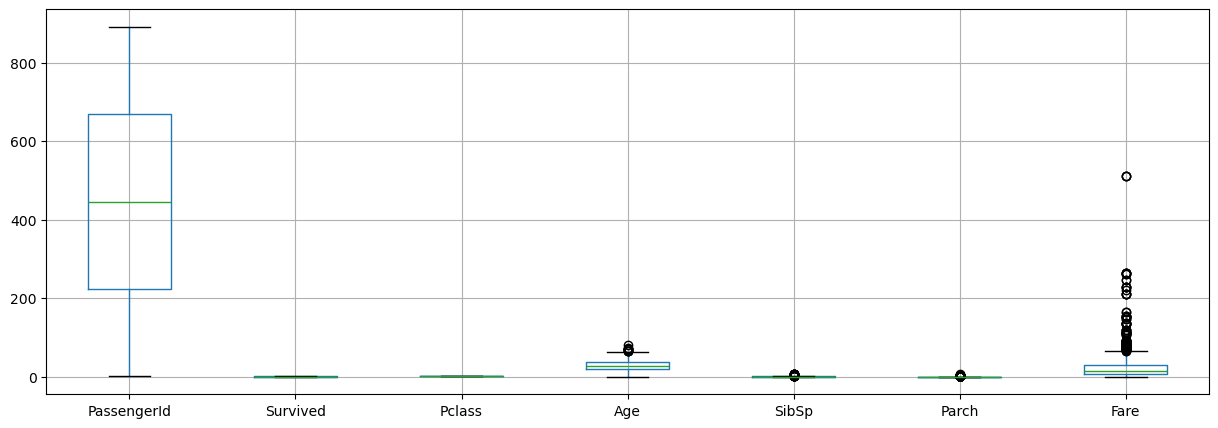

In [9]:
plt.figure(figsize=(15,5))
df.boxplot()

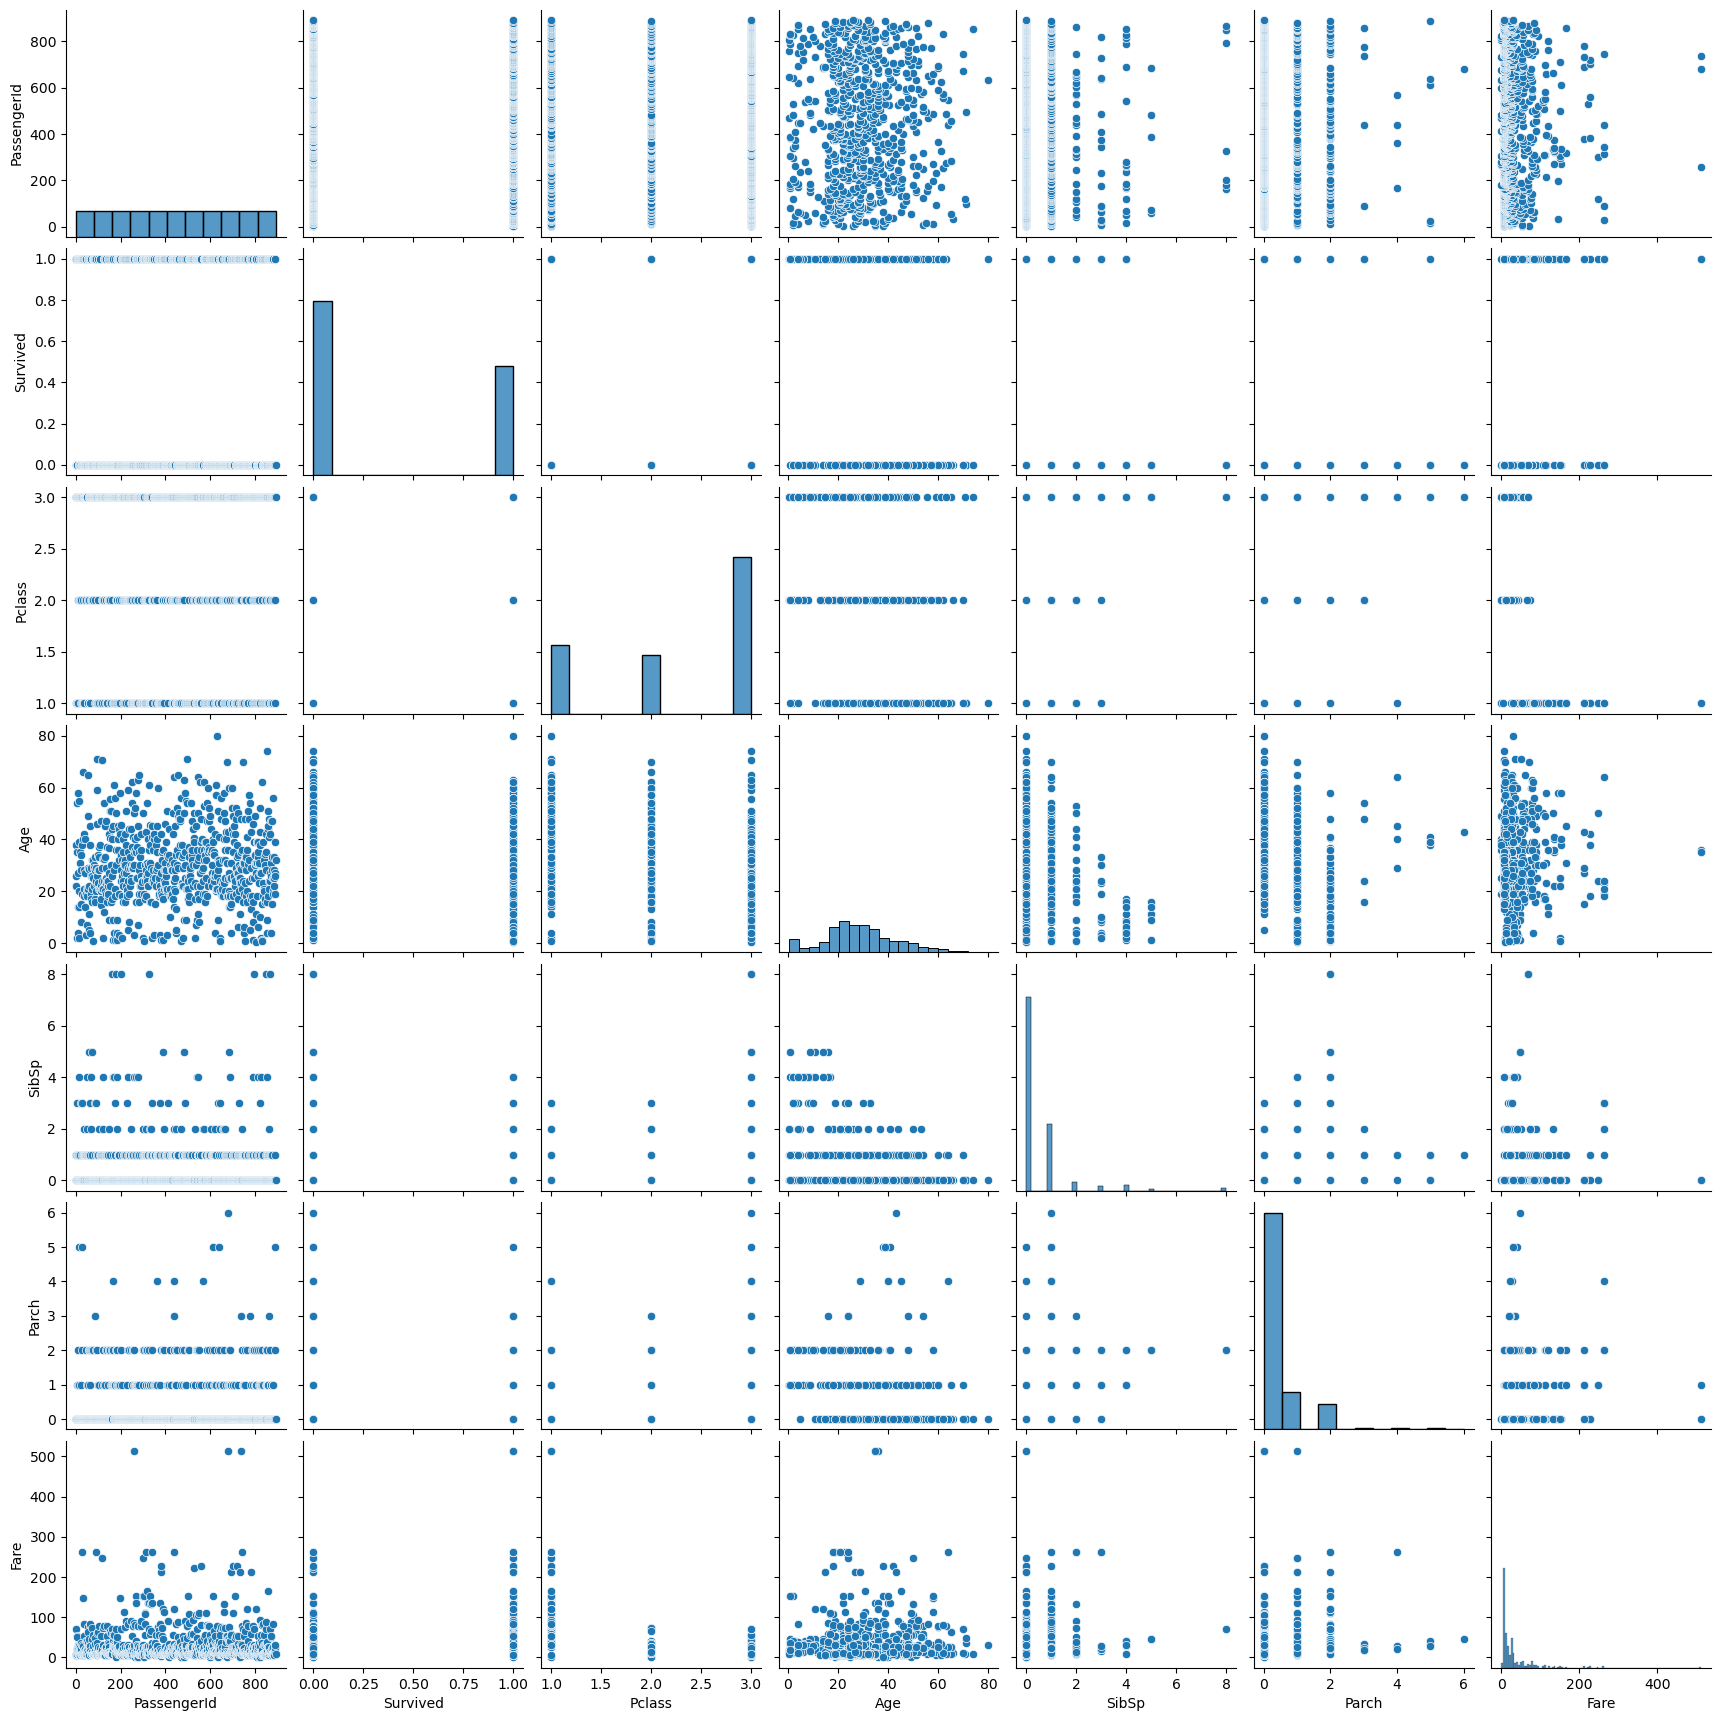

In [10]:
sns.pairplot(df)

## Feature Engineerig :

## 1. PassengerId

In [11]:
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
df['PassengerId'].nunique()

891

In [13]:
df.drop('PassengerId',axis = 1,inplace=True)

## 2. Pclass

In [14]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<Axes: >

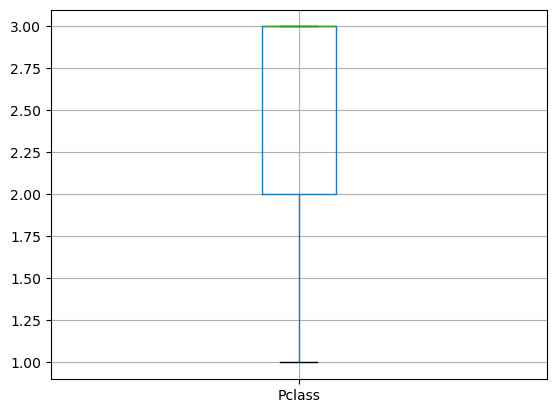

In [15]:
df[['Pclass']].boxplot()

## 3. Name

In [16]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [17]:
df['Name'].nunique()

891

In [18]:
df.drop('Name',axis =1,inplace=True)

## 4. Gender

In [19]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [20]:
df['Gender'].replace({'male':0, 'female':1},inplace=True)

In [21]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [22]:
Gender_col = {'male':0, 'female':1}
Gender_col

{'male': 0, 'female': 1}

## 5. Age

In [23]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<Axes: >

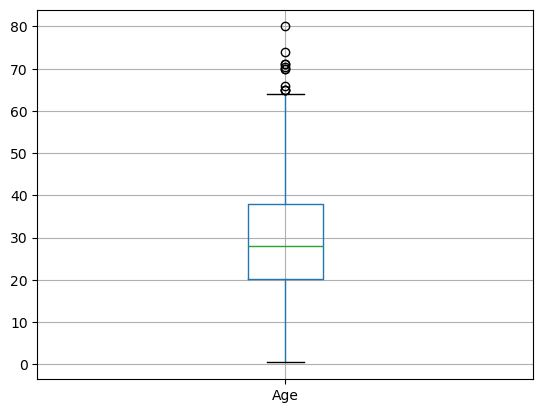

In [24]:
df[['Age']].boxplot()

In [25]:
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)

IQR = q3 - q1
m = df['Age'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

64.8125
-6.6875


In [26]:
df['Age'].loc[df['Age']>upper_tail]

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [27]:
df['Age'].loc[df['Age']>upper_tail]=upper_tail

In [28]:
df['Age'].loc[df['Age']>upper_tail]

Series([], Name: Age, dtype: float64)

<Axes: >

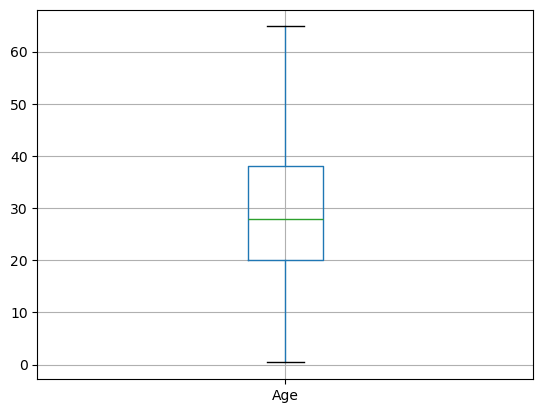

In [29]:
df[['Age']].boxplot()

In [30]:
df['Age'].isna().sum()

177

In [31]:
med = df['Age'].median()
med

28.0

In [32]:
df['Age'].fillna(med,inplace=True)

## 6. SibSp

In [33]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: >

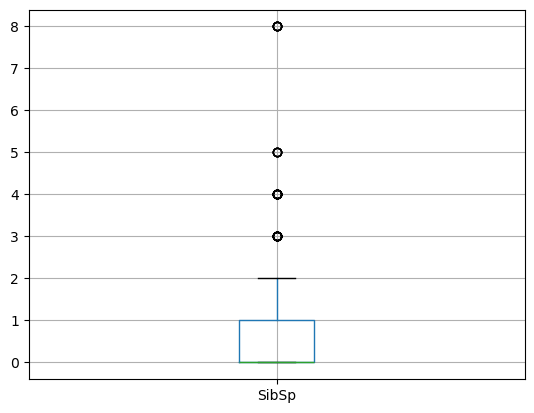

In [34]:
df[['SibSp']].boxplot()

In [35]:
q1 = df['SibSp'].quantile(0.25)
q2 = df['SibSp'].quantile(0.50)
q3 = df['SibSp'].quantile(0.75)

IQR = q3 - q1
m =df['SibSp'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

2.5
-1.5


In [36]:
df['SibSp'].loc[df['SibSp']>upper_tail]

7      3
16     4
24     3
27     3
50     4
59     5
63     3
68     4
71     5
85     3
88     3
119    4
159    8
164    4
171    4
176    3
180    8
182    4
201    8
229    3
233    4
261    4
266    4
278    4
324    8
341    3
374    3
386    5
409    3
480    5
485    3
541    4
542    4
634    3
642    3
683    5
686    4
726    3
787    4
792    8
813    4
819    3
824    4
846    8
850    4
863    8
Name: SibSp, dtype: int64

In [37]:
df['SibSp'].loc[df['SibSp']>upper_tail]=upper_tail

In [38]:
df['SibSp'].loc[df['SibSp']>upper_tail]

Series([], Name: SibSp, dtype: float64)

<Axes: >

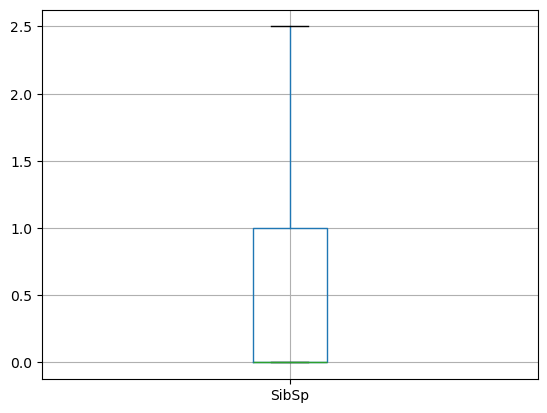

In [39]:
df[['SibSp']].boxplot()

## 7. Parch

In [40]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

<Axes: >

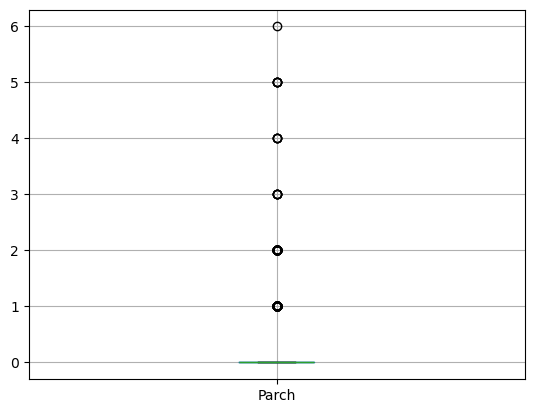

In [41]:
df[['Parch']].boxplot()

In [42]:
q1 = df['Parch'].quantile(0.25)
q2 = df['Parch'].quantile(0.50)
q3 = df['Parch'].quantile(0.75)

IQR = q3 - q1
m = df['Parch'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

0.0
0.0


In [43]:
df['Parch'].loc[df['Parch']>upper_tail]

7      1
8      2
10     1
13     5
16     1
24     1
25     5
27     2
43     2
50     1
54     1
58     2
59     2
63     2
65     1
68     2
71     2
78     2
86     3
88     2
93     2
97     1
98     1
102    1
118    1
119    2
124    1
128    1
136    2
140    2
145    1
147    2
148    2
153    2
155    1
159    2
160    1
164    1
165    2
166    1
167    4
171    1
172    1
175    1
176    1
180    2
182    2
183    1
184    2
188    1
193    1
197    1
201    2
205    1
229    1
233    2
237    2
247    2
248    1
251    1
254    2
255    2
259    1
261    2
262    1
266    1
268    1
272    1
273    1
278    1
279    1
297    2
299    1
305    2
311    2
312    1
314    1
318    2
319    1
323    1
324    2
328    1
329    1
332    1
340    1
341    2
348    1
352    1
356    1
360    4
362    1
374    1
377    2
381    2
386    2
390    2
394    2
407    1
409    1
416    1
417    2
419    2
423    1
424    1
435    2
436    2
437    3
438    4
440    1
445    2
446    1
4

In [44]:
df['Parch'].loc[df['Parch']>upper_tail]=upper_tail

In [45]:
df['Parch'].loc[df['Parch']>upper_tail]=upper_tail

In [46]:
df['Parch'].loc[df['Parch']>upper_tail]

Series([], Name: Parch, dtype: int64)

<Axes: >

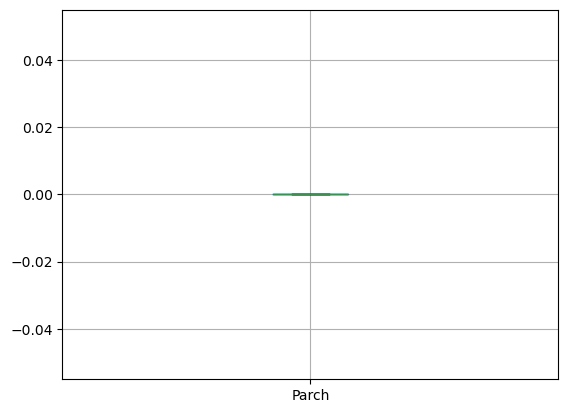

In [47]:
df[['Parch']].boxplot()

## 8. Ticket

In [48]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [49]:
df.drop('Ticket',axis =1,inplace=True)

## 9. Fare

In [50]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

<Axes: >

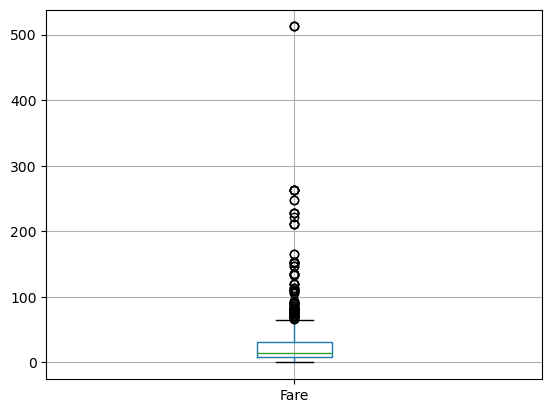

In [51]:
df[['Fare']].boxplot()

In [52]:
q1 = df['Fare'].quantile(0.25)
q2 = df['Fare'].quantile(0.50)
q3 = df['Fare'].quantile(0.75)

IQR = q3 - q1
m = df['Fare'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)

print(lower_tail)

65.6344
-26.724


In [53]:
df['Fare'].loc[df['Fare']>upper_tail]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
61      80.0000
62      83.4750
72      73.5000
88     263.0000
102     77.2875
118    247.5208
120     73.5000
124     77.2875
139     79.2000
151     66.6000
159     69.5500
180     69.5500
195    146.5208
201     69.5500
215    113.2750
218     76.2917
224     90.0000
230     83.4750
245     90.0000
256     79.2000
257     86.5000
258    512.3292
262     79.6500
268    153.4625
269    135.6333
275     77.9583
290     78.8500
291     91.0792
297    151.5500
299    247.5208
305    151.5500
306    110.8833
307    108.9000
310     83.1583
311    262.3750
318    164.8667
319    134.5000
324     69.5500
325    135.6333
332    153.4625
334    133.6500
336     66.6000
337    134.5000
341    263.0000
366     75.2500
369     69.3000
373    135.6333
375     82.1708
377    211.5000
380    227.5250
385     73.5000
390    120.0000
393    113.2750
412     90.0000
435    120.0000
438    263.0000
445     81.8583
453     

In [54]:
df['Fare'].loc[df['Fare']>upper_tail]=upper_tail

In [55]:
df['Fare'].loc[df['Fare']>upper_tail]

Series([], Name: Fare, dtype: float64)

<Axes: >

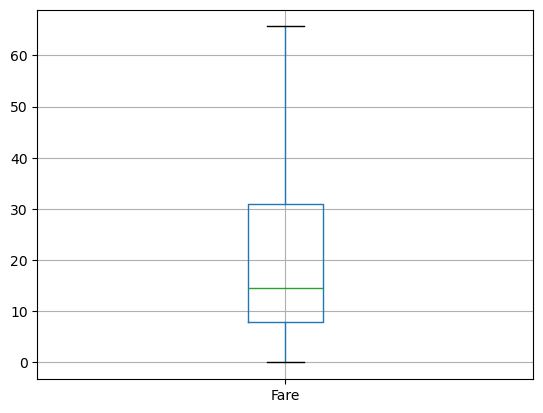

In [56]:
df[['Fare']].boxplot()

## 10. Cabin

In [57]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [58]:
df.drop('Cabin',axis=1,inplace=True)

## 11. Embarked

In [59]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [60]:
df = pd.get_dummies(df,columns=['Embarked'])
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1.0,0,7.2500,False,False,True
1,1,1,1,38.0,1.0,0,65.6344,True,False,False
2,1,3,1,26.0,0.0,0,7.9250,False,False,True
3,1,1,1,35.0,1.0,0,53.1000,False,False,True
4,0,3,0,35.0,0.0,0,8.0500,False,False,True


## 12. Survived

In [61]:
df['Survived'].unique()

array([0, 1], dtype=int64)

<Axes: >

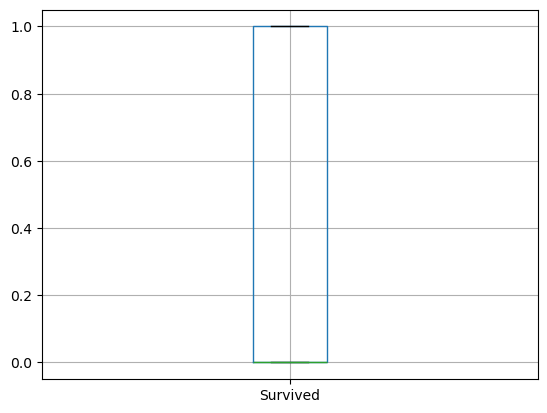

In [62]:
df[['Survived']].boxplot()

## Model Building :

In [63]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [65]:
model = LogisticRegression()

In [66]:
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred_test = model.predict(x_test)

y_pred_train = model.predict(x_train)

## Model Evaluation :

In [69]:
# for testing 

cnfx = confusion_matrix(y_test,y_pred_test)

clas = classification_report(y_test,y_pred_test)

acc = accuracy_score(y_test,y_pred_test)

print(cnfx)

print(clas)

print('Testing Accuracy :',round(acc,2))

[[101  16]
 [ 15  47]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       117
           1       0.75      0.76      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Testing Accuracy : 0.83


In [70]:
# for training 

cnfx = confusion_matrix(y_train,y_pred_train)

clas = classification_report(y_train,y_pred_train)

acc = accuracy_score(y_train,y_pred_train)

print(cnfx)

print(clas)

print('Training Accuracy :',round(acc,2))

[[355  75]
 [ 86 196]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       430
           1       0.72      0.70      0.71       282

    accuracy                           0.77       712
   macro avg       0.76      0.76      0.76       712
weighted avg       0.77      0.77      0.77       712

Training Accuracy : 0.77


## Dictionary of Encoded Columns :

In [71]:
column_names = x.columns
column_names

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [72]:
json_data = {'Gender':Gender_col,'column_names':list(x.columns)}
json_data

{'Gender': {'male': 0, 'female': 1},
 'column_names': ['Pclass',
  'Gender',
  'Age',
  'SibSp',
  'Parch',
  'Fare',
  'Embarked_C',
  'Embarked_Q',
  'Embarked_S']}

In [73]:
# saving dictionary into json file

with open('titanic.json','w') as f :
    json.dump(json_data,f)

In [77]:
# saving model into pickle file

with open('titanic.pkl','wb') as f :
    pickle.dump(model,f)

## Single User Input Testing 

In [78]:
x.head(1).T

,0
Pclass,3
Gender,0
Age,22.0
SibSp,1.0
Parch,0
Fare,7.25
Embarked_C,False
Embarked_Q,False
Embarked_S,True


In [86]:
Pclass = 3
Gender = 'male'
Age	= 22.0
SibSp = 1.0
Parch = 0
Fare = 7.25

Embarked = 'C'
Embarked = 'Embarked_' + Embarked
Embarked_index = list(x.columns).index(Embarked)

In [87]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
array = np.zeros(len(x.columns))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
array[0] = Pclass
array[1] = json_data['Gender'][Gender]
array[2] = Age
array[3] = SibSp
array[4] = Parch
array[5] = Fare
array[Embarked_index] == 1
array

array([ 3.  ,  0.  , 22.  ,  1.  ,  0.  ,  7.25,  0.  ,  0.  ,  0.  ])

In [94]:
predict = model.predict([array])[0]

if predict == 0:

    print('Passenger has NOT Survived...')

else :

    print('Passenger has Survived...')

Passenger has NOT Survived...


In [67]:
df.isna().sum()

Survived      0
Pclass        0
Gender        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64